In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
%matplotlib inline

In [144]:
A = np.array([[1,2,3],[4,5,6]])
print(A)
print(A.ndim)
A.shape[1]

[[1 2 3]
 [4 5 6]]
2


3

In [145]:
B = np.array([1,2])
np.tile(B,[2,2,2])


array([[[1, 2, 1, 2],
        [1, 2, 1, 2]],

       [[1, 2, 1, 2],
        [1, 2, 1, 2]]])

In [146]:
np.tile(1,[2,2])

array([[1, 1],
       [1, 1]])

In [143]:
myDataSet = np.array([[10,20],[2,3],[8,6],[11,6]])
labels = np.array(['B','A','B','B'])
inputData = np.array([[1,1]])

myDataSetSize = myDataSet.shape[0]
diffMat = np.tile(inputData,[myDataSetSize,1]) - myDataSet
sqDiffMat = diffMat ** 2
sqDistance = sqDiffMat.sum(axis=1)
distances = sqDistance**0.5
sortedDistIndices = distances.argsort()
print(distances)
print(sortedDistIndices)
print(labels)
print(labels[sortedDistIndices])

classcount= {}
for i in range(2):
    voteLabel = labels[sortedDistIndices[i]]
    classcount[voteLabel] = classcount.get(voteLabel,0) + 1
sortedClassCount = sorted(classcount, key=classcount.__getitem__, reverse = True)

print('classcount:', classcount)
print(sortedClassCount)
print('Class:',sortedClassCount[0][0]) 



[ 21.02379604   2.23606798   8.60232527  11.18033989]
[1 2 3 0]
['B' 'A' 'B' 'B']
['A' 'B' 'B' 'B']
classcount: {'A': 1, 'B': 1}
['A', 'B']
Class: A


In [6]:
cd Sample_Data/

C:\Users\Afaq\Documents\Sample_Data


In [99]:
d = {'A': 10, 'B': 3}
#sortedD= sorted(d.iteritems(), key = operator.itemgetter(1), reverse=True)
sortedD = sorted(d, key=d.__getitem__, reverse=True)
print(d)
print(sortedD)
print(sortedD[0][0])

{'A': 10, 'B': 3}
['A', 'B']
A


In [7]:
df=pd.read_csv('teleCust1000t.csv')

In [8]:
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64,4,5,0,0,2,1
1,3,11,33,1,7,136,5,5,0,0,6,4
2,3,68,52,1,24,116,1,29,0,1,2,3
3,2,33,33,0,12,33,2,0,0,1,1,1
4,2,23,30,1,9,30,1,2,0,0,4,3


In [156]:
df['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000180260674E0>]], dtype=object)

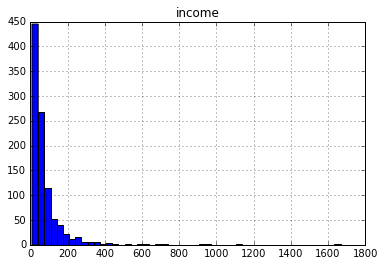

In [161]:
df.hist(column='income', bins=50)

In [2]:
df.columns  # to find the feature set X

NameError: name 'df' is not defined

In [27]:
X = df[['region', 'tenure','age', 'marital', 'address', 'income', 'ed', 'employ','retire', 'gender', 'reside']] .values
X[0:5]

array([[   2.,   13.,   44.,    1.,    9.,   64.,    4.,    5.,    0.,
           0.,    2.],
       [   3.,   11.,   33.,    1.,    7.,  136.,    5.,    5.,    0.,
           0.,    6.],
       [   3.,   68.,   52.,    1.,   24.,  116.,    1.,   29.,    0.,
           1.,    2.],
       [   2.,   33.,   33.,    0.,   12.,   33.,    2.,    0.,    0.,
           1.,    1.],
       [   2.,   23.,   30.,    1.,    9.,   30.,    1.,    2.,    0.,
           0.,    4.]])

In [28]:
Y = df['custcat'].values
Y[0:5]

array([1, 4, 3, 1, 3], dtype=int64)

In [11]:
#X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
#X[0:5]

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601,  1.0100505 ,  1.23481934,
         0.35951747, -1.36767088,  1.78752803, -0.22207644,  0.96655883,
        -0.23065004],
       [-0.02696767, -0.11831864, -0.69181243, -0.9900495 ,  0.04453642,
        -0.41625141, -0.54919639, -1.09029981, -0.22207644,  0.96655883,
        -0.92747794],
       [-0.02696767, -0.58672182, -0.93080797,  1.0100505 , -0.25303431,
        -0.44429125, -1.36767088, -0.89182893, -0.22207644, -1.03459817,
         1.16300577]])

In [41]:
#from sklearn.model_selection import train_test_split
from sklearn.cross_validation import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.2)
print ('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape)

Train set: (800, 11) (800,)
Test set: (200, 11) (200,)


In [42]:
from sklearn.neighbors import KNeighborsClassifier

In [43]:
k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,Y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=4, p=2,
           weights='uniform')

In [47]:
#X_test[0:5]
X_train[0:5]

array([[   2.,   25.,   38.,    1.,   19.,   56.,    1.,   19.,    0.,
           1.,    2.],
       [   1.,   11.,   41.,    1.,    0.,   39.,    1.,    1.,    0.,
           1.,    2.],
       [   3.,   65.,   58.,    0.,   13.,  167.,    2.,   14.,    0.,
           1.,    2.],
       [   1.,   24.,   46.,    0.,   12.,   43.,    2.,    6.,    0.,
           0.,    1.],
       [   1.,   17.,   51.,    1.,   10.,   95.,    2.,   15.,    0.,
           1.,    2.]])

In [48]:
yhat = neigh.predict(X_train)
yhat[0:5]

array([3, 3, 4, 4, 1], dtype=int64)